In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
pd.set_option('display.max_columns', None)


In [29]:
hr_data = pd.read_csv("general_data.csv")

In [30]:
hr_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [31]:
hr_data.shape

(4410, 24)

In [32]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### Data Preprocessing

In [33]:
hr_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [34]:
hr_data=hr_data.fillna(0)

In [35]:
hr_data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [36]:
hr_data['Attrition']=[1 if a=="Yes" else 0 for a in hr_data['Attrition']]

### Calculating Imbalance percentage

In [37]:
hr_data.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

The target column has 2 values 0 and 1. <br/>
0 represents customers with no attrition <br/>
1 represents customers with yes attrition <br/>


In [40]:
target0_df=hr_data.loc[hr_data["Attrition"]==0]
target1_df=hr_data.loc[hr_data["Attrition"]==1]
round(len(target0_df)/len(target1_df),2)

5.2

The Imbalance ratio is 5.2 %

In [11]:
hr_data['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [12]:
def label_travel(x):
    if x=="Travel_Rarely":
        return 1
    if x=="Travel_Frequently":
        return 2
    if x=="Non-Travel":
        return 0
    return 0

In [13]:
hr_data['MonthlyIncome']=np.log10(hr_data['MonthlyIncome'].values)
hr_data['BusinessTravel']=list(map(label_travel,hr_data['BusinessTravel'].values))
print(hr_data.describe())

               Age    Attrition  BusinessTravel  DistanceFromHome  \
count  4410.000000  4410.000000     4410.000000       4410.000000   
mean     36.923810     0.161224        1.086395          9.192517   
std       9.133301     0.367780        0.532049          8.105026   
min      18.000000     0.000000        0.000000          1.000000   
25%      30.000000     0.000000        1.000000          2.000000   
50%      36.000000     0.000000        1.000000          7.000000   
75%      43.000000     0.000000        1.000000         14.000000   
max      60.000000     1.000000        2.000000         29.000000   

         Education  EmployeeCount   EmployeeID     JobLevel  MonthlyIncome  \
count  4410.000000         4410.0  4410.000000  4410.000000    4410.000000   
mean      2.912925            1.0  2205.500000     2.063946       4.714310   
std       1.023933            0.0  1273.201673     1.106689       0.288502   
min       1.000000            1.0     1.000000     1.000000       

In [14]:
hr_data=pd.get_dummies(hr_data, columns=['Department','EducationField','JobRole','MaritalStatus','Gender'])
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced',

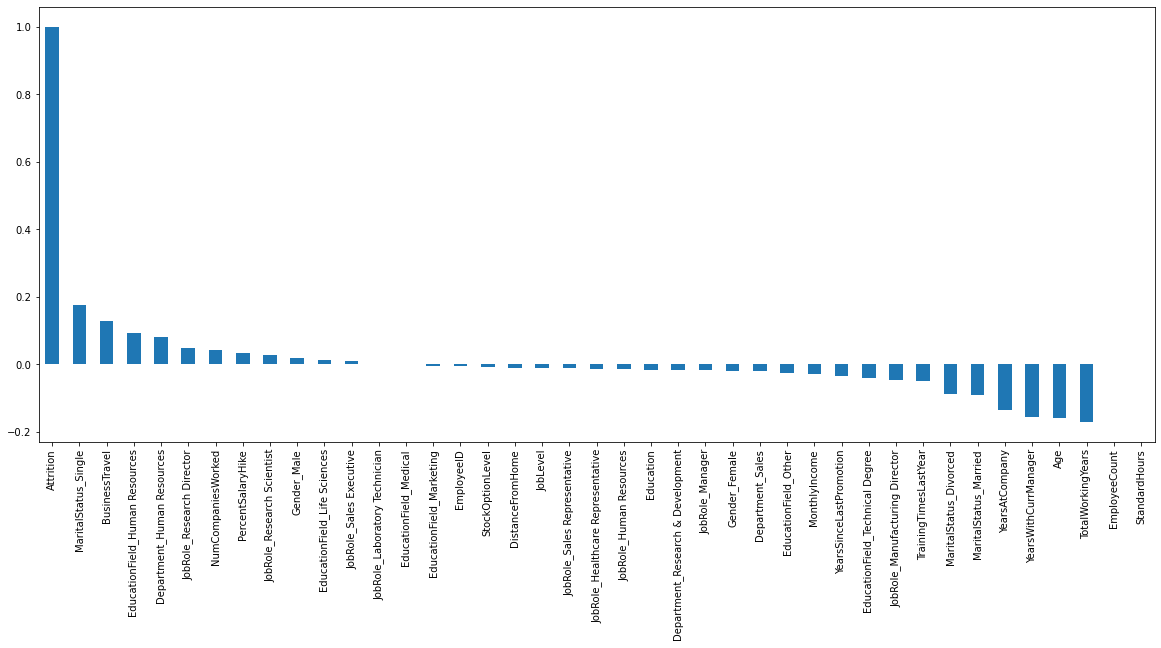

In [15]:
plt.figure(figsize=(20,8))
hr_data.corr()['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [16]:
hr_data

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male
0,51,0,1,6,2,1,1,1,5.117801,1.0,Y,11,8,0,1.0,6,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,31,1,2,10,1,1,2,1,4.622110,0.0,Y,23,8,1,6.0,3,5,1,4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,32,0,2,17,4,1,3,4,5.286187,1.0,Y,15,8,3,5.0,2,5,0,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
3,38,0,0,2,5,1,4,3,4.920176,3.0,Y,11,8,3,13.0,5,8,7,5,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,32,0,1,10,1,1,5,1,4.369587,4.0,Y,12,8,2,9.0,2,6,0,4,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,1,5,4,1,4406,1,4.780245,3.0,Y,17,8,1,10.0,5,3,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4406,29,0,1,2,4,1,4407,1,4.427973,2.0,Y,15,8,0,10.0,2,3,0,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4407,25,0,1,25,2,1,4408,2,4.568436,0.0,Y,20,8,0,5.0,4,4,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
4408,42,0,1,18,2,1,4409,1,4.379849,0.0,Y,14,8,1,10.0,2,9,7,8,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


In [18]:
hr_data.to_csv('hr_data.csv', encoding='utf-8', index=False)

In [41]:
hr_data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,0,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,0.0,6,21,3,9
